## 결측치 확인

#### 1. 부채, 가맹점 수, 평균매출액이 0, 결측치 제외.
    df2.to_excel("./../9 - Data/결측치제외.xlsx")

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager,rc
if platform.system() == 'Windows' :
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

### 원본데이터(recal2data)와 sns평균데이터(긍정비율) 결합

In [5]:
data = pd.read_excel("./../9 - Data/project/recal2data.xlsx")
sns = pd.read_excel("./../9 - Data/project/긍정비율.xlsx")
df = pd.merge(data,sns,on=['브랜드'],how = 'inner')



### 필요한 column만 추출

In [6]:
df = df[['브랜드','가맹점 수', '신규개점', '계약종료', '계약해지', '중분류', '자산', '매출액', '영업이익', '자본', '당기순이익', 
         '부채', '부채비율', '자기자본비율','법위반횟수', '가맹점 매출액','가맹사업 개월수', '비용 합계','총언급량','긍정','중립','부정']]

# 1.

In [7]:
df.describe()

,가맹점 수,신규개점,계약종료,계약해지,자산,매출액,영업이익,자본,당기순이익,부채,부채비율,자기자본비율,법위반횟수,가맹점 매출액,가맹사업 개월수,비용 합계,총언급량,긍정,중립,부정
count,4396.000000,4396.00000,4396.000000,4396.000000,3.639000e+03,3.832000e+03,3.640000e+03,3.641000e+03,3.640000e+03,3.641000e+03,3398.000000,3398.000000,4396.000000,4.396000e+03,4396.000000,4.396000e+03,4.396000e+03,4.396000e+03,4396.000000,4396.000000
mean,26.143312,5.42152,0.945860,2.383530,1.366477e+07,1.469871e+07,5.152276e+05,6.401410e+06,1.255511e+05,7.279675e+06,inf,0.134656,0.054595,1.184170e+05,59.333258,1.026000e+05,4.079389e+03,2.816518e+03,266.736351,996.134213
std,107.792946,17.49158,4.814727,8.229769,1.287778e+08,1.048473e+08,4.941120e+06,7.679216e+07,6.295004e+06,6.063171e+07,NaN,1.403288,0.265968,2.266198e+05,54.094879,9.631122e+04,5.302626e+04,3.699461e+04,3777.309978,14798.930928
min,0.000000,0.00000,0.000000,0.000000,-2.304000e+04,0.000000e+00,-2.422069e+07,-1.095056e+07,-8.041570e+07,-2.648080e+05,-518.009077,-27.924408,0.000000,0.000000e+00,7.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,9.543900e+04,2.033182e+05,-9.289750e+03,1.458000e+03,-6.939500e+03,4.792100e+04,0.084735,0.096571,0.000000,0.000000e+00,23.000000,5.700000e+04,4.000000e+00,3.000000e+00,0.000000,0.000000
50%,4.000000,1.00000,0.000000,0.000000,4.037390e+05,7.526400e+05,2.012900e+04,9.487700e+04,1.829350e+04,2.888640e+05,0.827132,0.356313,0.000000,0.000000e+00,41.000000,8.188000e+04,2.200000e+01,2.000000e+01,0.000000,1.000000
75%,17.000000,5.00000,0.000000,1.000000,1.650712e+06,2.699501e+06,1.189535e+05,5.228890e+05,9.053025e+04,1.121663e+06,2.411197,0.624189,0.000000,1.755900e+05,78.000000,1.209938e+05,1.270000e+02,1.120000e+02,3.000000,6.000000
max,3367.000000,639.00000,102.000000,184.000000,3.848518e+09,1.862187e+09,1.514469e+08,2.618416e+09,1.942439e+08,1.230102e+09,inf,4.591580,6.000000,3.318298e+06,493.000000,3.491500e+06,1.977186e+06,1.271636e+06,160739.000000,664146.000000


(array([1.397e+03, 2.980e+02, 2.190e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([0.00000000e+00, 7.66097838e-01, 1.53219568e+00, ...,
        3.36546780e+03, 3.36623390e+03, 3.36700000e+03]),
 <a list of 4395 Patch objects>)

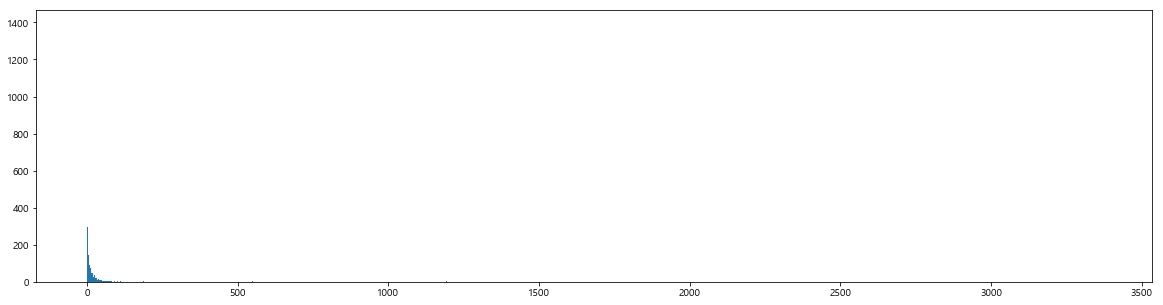

In [8]:
#0이 많다. 문제점인식.
plt.figure(figsize=(20,5))
plt.hist(df["가맹점 수"],bins=4395)
# plt.ylim(0,200)

In [9]:
df = df[df['부채']>0]
df = df[df['가맹점 수']>0]
df = df[df['가맹점 매출액']>0]
df.shape

(1590, 22)

In [10]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop='index')
df.shape

(1556, 22)

In [12]:
df.to_excel("./../9 - Data/결측치제외.xlsx")